# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů určete jeho chybu pomocí RMSE a MAE. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tato data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte s využitím tří sloupců: **Country**, **Year** a **Life expectancy**. Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka prvních řádků souboru `results.csv`:
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

In [360]:
# importy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

import sklearn.metrics as metrics

import warnings

random_seed = 42


# 1. Analyza a Uprava Dat

In [3]:
df_data = pd.read_csv("data.csv")

## Prvni pohled

In [4]:
display(df_data.head())
display(df_data.tail())

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2713,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2714,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2715,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2716,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2717,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2564 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2188 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2692 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

In [6]:
df_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2718.000000,2718.000000,2718.000000,2718.000000,2564.000000,2718.000000,2188.000000,2718.000000,2692.000000,2718.000000,2700.000000,2529.000000,2700.000000,2718.000000,2317.000000,2.116000e+03,2692.000000,2692.000000,2576.000000,2576.000000
mean,2007.113687,69.204525,164.432303,30.825239,4.672512,757.071658,80.884826,2370.999632,38.314339,42.767476,82.528148,5.943606,82.135926,1.788263,7646.459541,1.261063e+07,4.892236,4.925149,0.626697,11.996079
std,4.537979,9.612530,125.512789,121.786599,4.051664,2007.472092,25.010075,11174.241799,19.954800,165.704415,23.294376,2.488801,23.849574,5.221587,14455.594394,6.238395e+07,4.434584,4.522269,0.213323,3.364109
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.100000,73.250000,0.000000,0.990000,5.832385,77.000000,0.000000,19.200000,0.000000,77.000000,4.260000,78.000000,0.100000,459.291200,1.829220e+05,1.600000,1.600000,0.492000,10.100000
50%,2007.000000,72.200000,142.000000,3.000000,3.820000,67.687008,92.000000,18.000000,43.450000,4.000000,93.000000,5.730000,93.000000,0.100000,1741.142552,1.365022e+06,3.400000,3.400000,0.679000,12.300000
75%,2011.000000,75.800000,227.000000,22.000000,7.832500,446.887709,97.000000,372.000000,56.100000,28.000000,97.000000,7.530000,97.000000,0.800000,6337.882993,7.383590e+06,7.200000,7.300000,0.781000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.938000,20.700000


In [7]:
df_data.select_dtypes(include=["object"]).describe()

,Country,Status
count,2718,2718
unique,183,2
top,Afghanistan,Developing
freq,16,2248


In [8]:
df_data.isna().any()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                             True
percentage expenditure             False
Hepatitis B                         True
Measles                            False
BMI                                 True
under-five deaths                  False
Polio                               True
Total expenditure                   True
Diphtheria                          True
HIV/AIDS                           False
GDP                                 True
Population                          True
thinness  1-19 years                True
thinness 5-9 years                  True
Income composition of resources     True
Schooling                           True
dtype: bool

In [9]:
df_data.nunique()

Country                             183
Year                                 16
Status                                2
Life expectancy                     359
Adult Mortality                     423
infant deaths                       195
Alcohol                            1055
percentage expenditure             2185
Hepatitis B                          87
Measles                             909
BMI                                 600
under-five deaths                   239
Polio                                73
Total expenditure                   792
Diphtheria                           81
HIV/AIDS                            197
GDP                                2317
Population                         2110
thinness  1-19 years                194
thinness 5-9 years                  200
Income composition of resources     613
Schooling                           173
dtype: int64

## Analyza a Uprava Priznaku

### Country
***

Tento priznak nema chybejici hodnoty, nemusim s tim nic resit.

In [10]:
df_data['Country'].nunique()

183

Vidime ze mame 183 unikatnich hodnot. Tento priznak je diskretni nominalni, nedava smysl usporadani. 

Muzeme to opravit dvema zpusoby:


**One-hot:**

Pro rozhodovaci stromy v nahodnem lesu nominalni priznak bude problematicky protoze tam se to chova ke vsem priznakum jako k ordinalnim. Proto sice pri pouziti one-hot encoding se zvysi dimenzionalita, ale rozhodovaci stromy jsou proti tomuto odolne.

Linearni regrese muze mit problem, ze timto muzeme vytvorit nebo zhorsit problem kolinearity nebo vytvorit linearne zavisle priznaky. Ale muzeme provest one-hot encoding a pouzit lasso k odstraneni kolinearnich nebo linearne zavislych priznaku.

Hrebenova regrese a lasso kvuli regularizacnimu clenu one-hot encoding dokaze zvladnout. Budeme mit ve vysledku vice vah, ktere bude potreba penalizovat. 

**Problemy one-hot:**


Musime zarucit, ze pri one-hot encodingu na vstupu nedostaneme stat, pro ktery neexistuje prislusny priznak. Tj. bude potreba vzycky upravit vstup tak, aby prevedl data do spravneho tvaru, aby priznaky byly ve spravnem poradi a byli kompletni. 

Pri zkoumani datasetu evaluations.csv muzeme si vsimnout ze ma mene statu, ale neobsahuje nic navic oproti nasemu datasetu data.csv. Tj. bude potreba chytre upravit evaluations.csv, aby mel stejnou one-hot strukturu.

**Prevedeni na ciselnou reprezentaci pomoci LabelEncoder nebo cat.codes:**

Pro rozhodovaci stromy v nahodnem lese to bude problem, protoze jak jiz bylo receno vyse, rozhodovaci stromu chovaji se k datum jako k ordinalnim. 

Linearni, hrebenova regrese a lasso taky to nemuseji zvladnout dobre, protoze budou muset nastavit vahu, kterou se hodnota priznaku bude nasobit, coz nemusi davat smysl, kdy dva staty budou tesne vedle sebe ale mit velmi rozdilne vysvetlovane promenne. Muze tady zahrat roli i ucrite serazeni.

Zatim pro jednoduchost pouzijeme cat.codes, protoze je to casove mene narocne, pokud zbyde cas, zkusime one-hot

In [11]:
df_data['Country'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2718 entries, 0 to 2717
Series name: Country
Non-Null Count  Dtype 
--------------  ----- 
2718 non-null   object
dtypes: object(1)
memory usage: 21.4+ KB


In [12]:
df_data['Country'].describe()

count            2718
unique            183
top       Afghanistan
freq               16
Name: Country, dtype: object

### Year
***

Tento priznak neobsahuje chybejici hodnoty, nemusime to resit.

Year muzeme chapat jako ordinalni priznak. Opravdu usporadat roky dava smysl. Nastesti je reprezentovan datovym typem int64, takze nemusime provadet konverzi, roky se budou porovnavat dobre.

In [13]:
df_data['Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2718 entries, 0 to 2717
Series name: Year
Non-Null Count  Dtype
--------------  -----
2718 non-null   int64
dtypes: int64(1)
memory usage: 21.4 KB


In [14]:
df_data['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

### Status
***

Tento priznak je binarni, obsahuje pouze dve unikatni hodnoty, proto muzeme ho prevest na kategoricky neusporadany typ.

### Life Expectancy
***

Tento priznak je nase vysvetlovana promenna, vypada v poradku, jenom osetrime jeste na odlehle hodnoty

In [15]:
display(df_data['Life expectancy'].head())
display(df_data['Life expectancy'].tail())

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

2713    44.3
2714    44.5
2715    44.8
2716    45.3
2717    46.0
Name: Life expectancy, dtype: float64

In [16]:
df_data['Life expectancy'].describe()

count    2718.000000
mean       69.204525
std         9.612530
min        36.300000
25%        63.100000
50%        72.200000
75%        75.800000
max        89.000000
Name: Life expectancy, dtype: float64

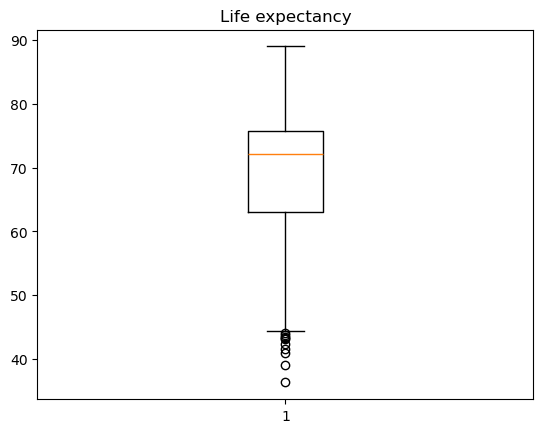

In [17]:
fig, ax = plt.subplots()
ax.boxplot(df_data['Life expectancy'])
ax.set_title("Life expectancy")
fig.show()

In [18]:
Q3 = 75.8
Q1 = 63.1
IQR = Q3 - Q1
lower_bound = Q1 - 1.5* IQR
print(f"Under minimum - {lower_bound:.2f}: {(df_data['Life expectancy'] < lower_bound).sum()}")

Under minimum - 44.05: 10


Vidime, ze nejake odlehle hodnoty sice mame, ale jsou docela tesne k lower boundu a je jich jenom 10. Rozhodovaci strom outlieri neovlivni. Linearni, hrebenovou regresi a lasso 10 outlieru nemelo by ovlivnit.

### Zbytek Priznaku
***

Zbytek priznaku vypada v poradku (alespoň zádné záporné hodnoy tam kde to nemá smysl) krome chybejicich hodnot a moznych odlehlych hodnot. Chybejici hodnoty budeme resit zvlast pro nahodny les a pro modely typu linearni regrese.

Jedine co tady udelame - koukneme na odlehle hodnoty, abychom meli o tom informaci. Sice to zatim resit nebudeme, ale pokud zbyde cas, meli bychom pro modely typu linearni regrese je odstranit nebo nejak inteligentne omezit (napriklad na trenovacich datech se naucit nejaky maximum a minimum a na validacnich nebo testovacich datech orezavat hodnoty, pokud by se nevesli do intervalu nauceneho z trenovacich dat), protoze outlieri mohou spatne ovlivnit intercept (posuniti nadrovny) a sklon nadroviny pomoci ktere predikujeme.

In [19]:
cols_to_inspect  = [column for column in df_data.columns if column not in ['Country', 'Year', 'Status', 'Life expectancy']]

In [20]:
print(cols_to_inspect)
print(f"Columns number: {len(cols_to_inspect)}")

['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']
Columns number: 18


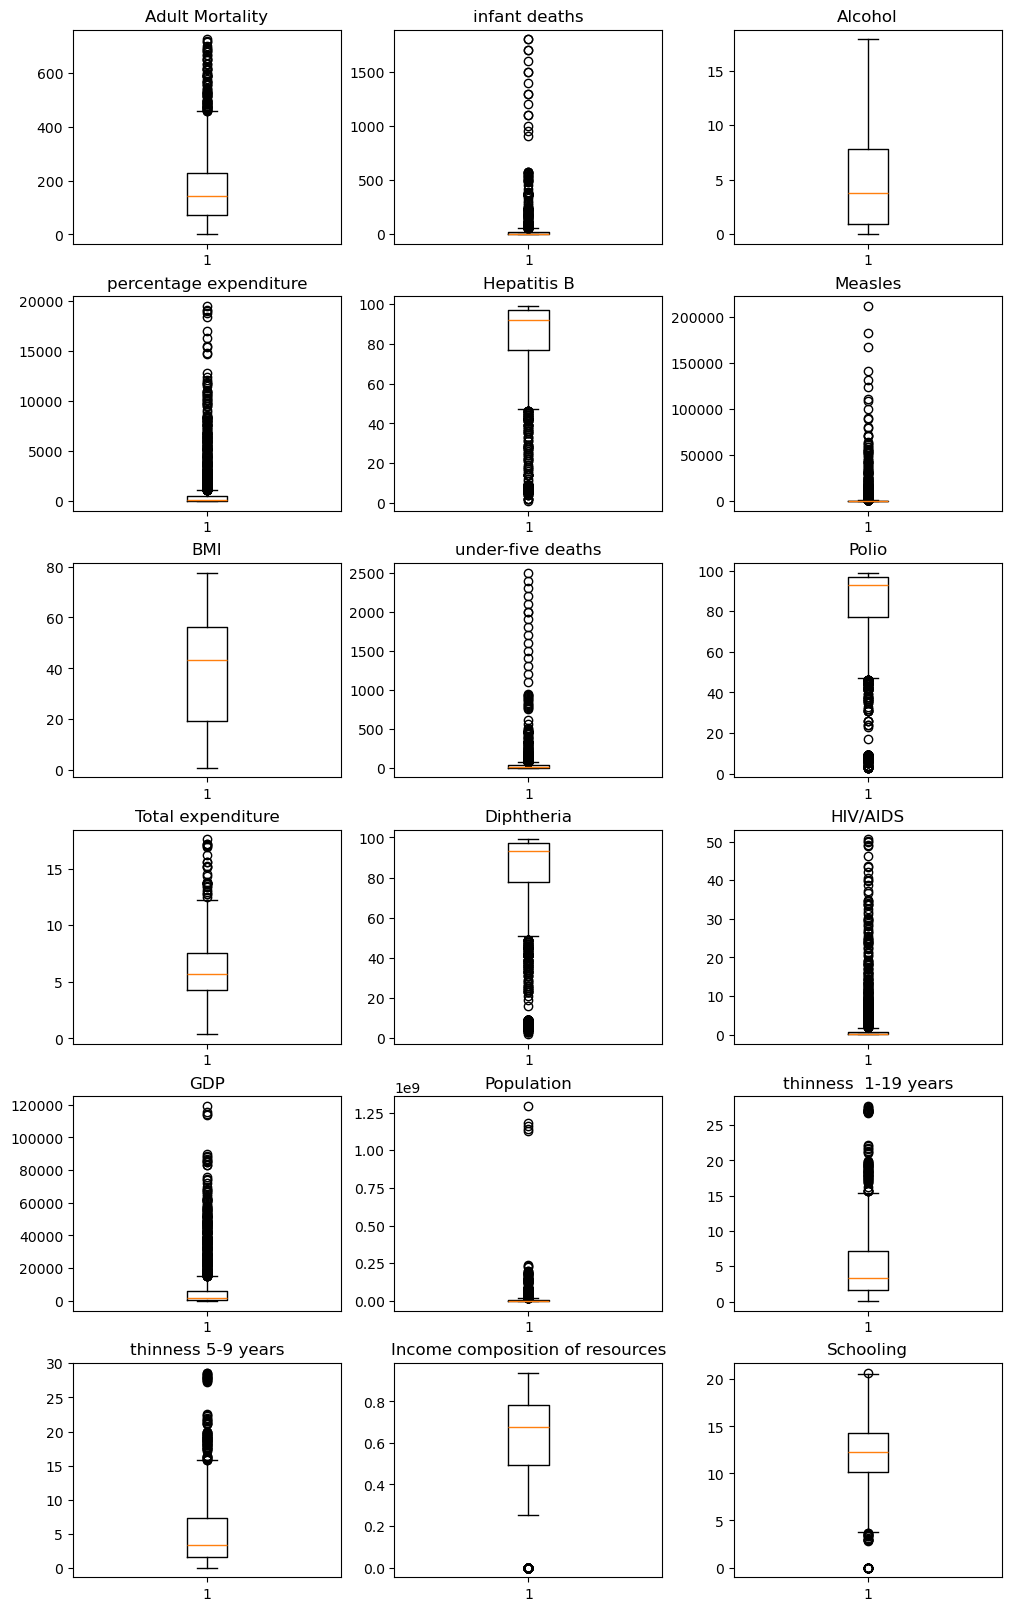

In [21]:
fig, axes = plt.subplots(nrows=6, ncols=3, constrained_layout=True, figsize=(10,16))
for i in range(0, 18):
    row = i // 3
    col = i % 3
    axes[row][col].set_title(cols_to_inspect[i])
    # nezapomene odstranit chybejici hodnoty, jinak boxplot selze
    axes[row][col].boxplot(df_data[cols_to_inspect[i]].dropna())
fig.show()

Vidime ze dataset ma opravdu dost outlieru. Zase, pokud stihneme, tak to potom poresime bud odstranenim dat, anebo naucime se z trenovaci mnoziny jak outliery oriznout (napriklad nahradit lower boundem (Q1 - 1.5 * IQR) nebo upper boundem (Q3 + 1.5 * IQR) na zaklade trenovacich dat (nikoliv validacnich nebo nedej boze testovacich), idealne se zvazenim relativniho poctu outlieru a miry jejich odlehlosti)

Co bychom mohli jeste analyzovat (aby to bylo vhodne pro vsechny uvazovane modely ktere budeme zkouset)? 


Mohli bychom posoudit korelacni koeficienty mezi jednotlivymi priznaky, na zaklade cehoz bychom mohli nektere z nich vyhodit (protoze by mohli byt de facto linearni kombinaci jineho sloupce nebo kolinearni s jinym sloupcem). Tuto ulohu bychom mohli resit pomoci ruznych algoritmu pro vyber priznaku.

### Uprava Priznaku
***

Zatim usetrime si cas a udelame co nejrychleji nejnutnější upravy - prevedeme Country a Status pomoci LabelEncoder na ciselne hodnoty. Dalsi upravy budeme provadet v zavislosti na modelu. Pokud zbyde cas zkusime OneHotEncoder od scikitu.

In [30]:
df_preprocessed = df_data.copy(deep=True)

In [32]:
country_label_encoder = LabelEncoder()
country_label_encoder.fit(df_data['Country'])
df_preprocessed['Country'] = country_label_encoder.transform(df_data['Country'])
df_preprocessed.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [33]:
status_label_encoder = LabelEncoder()
df_preprocessed['Status'] = status_label_encoder.fit_transform(df_data['Status'])
df_preprocessed.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [34]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   int64  
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   int64  
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2564 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2188 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2692 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

Vsechny priznaky ted maji spravny datatyp. Muzeme tedy zacit trenovat modely.

# 2. Nahodny Les

### CustomRandomForest
***

max_samples budeme pouzvat jako absolutni cislo datovych bodu

In [108]:
# Váš kód zde


########################################################
# Předpřipravená kostra modelu náhodného lesa
class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """

    def __init__(self, n_estimators, max_samples, max_depth, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberte si, zda tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1)
                          nebo absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny),
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """
        self.trees = list()
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        pass

    def fit(self, X: pd.DataFrame, y: pd.Series):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples_fraction
        """
        self.trees.clear()

        for _ in range(0, self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            X_bootstrap = X.sample(n=self.max_samples, replace=True)
            y_bootstrap = y[X_bootstrap.index]
            # display(X_bootstrap)
            # display(y_bootstrap)
            # display(df_preprocessed.loc[X_bootstrap.index])
            tree.fit(X=X_bootstrap, y=y_bootstrap)
            self.trees.append(tree)
        pass

    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """
        predictions = []
        for tree in self.trees:
            predictions.append(tree.predict(X))
        return np.mean(predictions, axis=0)

### Vhodnost Daneho Modelu
***

Tento typ ulohy je docela vhodny pro nahodny les - dataset ma problemy se kterymi nahodny les umi dobre vyporadat - chybejici hodnoty, hodne priznaku, odlehle hodnoty. 

Jediny problem, ktery muzeme uvidet je nominalni priznak (Country), ktery muze mit vliv na odhad, ale ma hodne unikatnich hodnot kde nema smysl usporadani (i kdyz bychom mohli to trochu zlepsit tim, ze usporadame dle nejakeho kriteria, napriklad bohaty nebo chudy stat - ale to uz popisuje priznak s HDP. Jinak bychom potrebovali vyuzit dalsi data nekde z internetu, ale to uz nevchazi v ramce ulohy). One hot encoding by to mel zlepsit, ale trenovani uz muze byt vypocetni narocnejsi (183 novych priznaku uz je hodne)

### Priprava a Rozdeleni Dat
***

Z analyzy dat jsme se rozhodli, ze jedinou upravu kterou potrebujeme je zamenit chybejici hodnoty. 

My udelame to nejjednodussi - nahradime NaN na -1 (nemame zadny priznak ktery obsahuje zaporne hodnoty, takze -1 se bude hodit). 

Samozrejme bychom mohli zajit trochu dale a pouzit chytrejsi techniki pomoci nejakych imputeru, napriklad bychom mohli z trenovacich dat se naucit median a potom pouze transformovat validacni a nova data. Ale usetrime si cas a pouze vymenime hodnoty.

In [36]:
df_random_forest = df_preprocessed.copy(deep=True)
df_random_forest.fillna(value=-1, inplace=True)
df_random_forest.isna().any()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
BMI                                False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
HIV/AIDS                           False
GDP                                False
Population                         False
thinness  1-19 years               False
thinness 5-9 years                 False
Income composition of resources    False
Schooling                          False
dtype: bool

Toto je konec naseho predzpracovani dat, rozdelime to ted trenovaci, validacni a testovaci data.

In [39]:
# 60% trenovaci, 40% zbytek
Xtrain, Xrest, ytrain, yrest = train_test_split(
    df_random_forest.drop(columns=["Life expectancy"]),
    df_random_forest["Life expectancy"],
    test_size=0.4,
)

# 0.4*0.6 = 0.24 -> 24% validacni, 0.4*0.4 = 0.16 -> 16% testovaci
Xtest, Xval, ytest, yval = train_test_split(Xrest, yrest, test_size=0.6)

### Trenovani a Evaluace
***

Zkusime nasi implementaci nejprve rucne:

In [95]:
train_samples_len = len(Xtrain)
train_samples_len

1630

In [103]:
clf_forest = CustomRandomForest(4, max_samples=100, max_depth=5)
clf_forest.fit(X=Xtrain, y=ytrain)
ytrain_pred = clf_forest.predict(Xtrain)
yval_pred = clf_forest.predict(Xval)

train_rmse_forest = metrics.mean_squared_error(ytrain, ytrain_pred, squared=False)
valid_rmse_forest = metrics.mean_squared_error(yval, yval_pred, squared=False)

train_mae_forest = metrics.mean_absolute_error(
    ytrain,
    ytrain_pred,
)
valid_mae_forest = metrics.mean_absolute_error(yval, yval_pred)

print(f"RMSE (train): \t{train_rmse_forest}")
print(f"RMSE (val): \t{valid_rmse_forest}")
print(f"MAE (train): \t{train_mae_forest}")
print(f"MAE (val): \t{valid_mae_forest}")

RMSE (train): 	3.5433341909532334
RMSE (val): 	3.384203531356113
MAE (train): 	2.577814584188817
MAE (val): 	2.420935345920032


Ted budeme zkouset vice hyperparametru:

In [122]:
param_grid = {
    "max_depth": range(5, 30, 2),
    "max_samples": range(200, train_samples_len, 200),
    "n_estimators": range(3, 30, 3),
}
param_comb = ParameterGrid(param_grid=param_grid)
len(param_comb)

936

In [123]:
train_rmse = []
val_rmse = []
for params in param_comb:
    clf_forest = CustomRandomForest(**params)
    clf_forest.fit(X=Xtrain, y=ytrain)
    ytrain_pred = clf_forest.predict(Xtrain)
    yval_pred = clf_forest.predict(Xval)
    train_rmse.append(metrics.mean_squared_error(ytrain, ytrain_pred, squared=False))
    val_rmse.append(metrics.mean_squared_error(yval, yval_pred, squared=False))

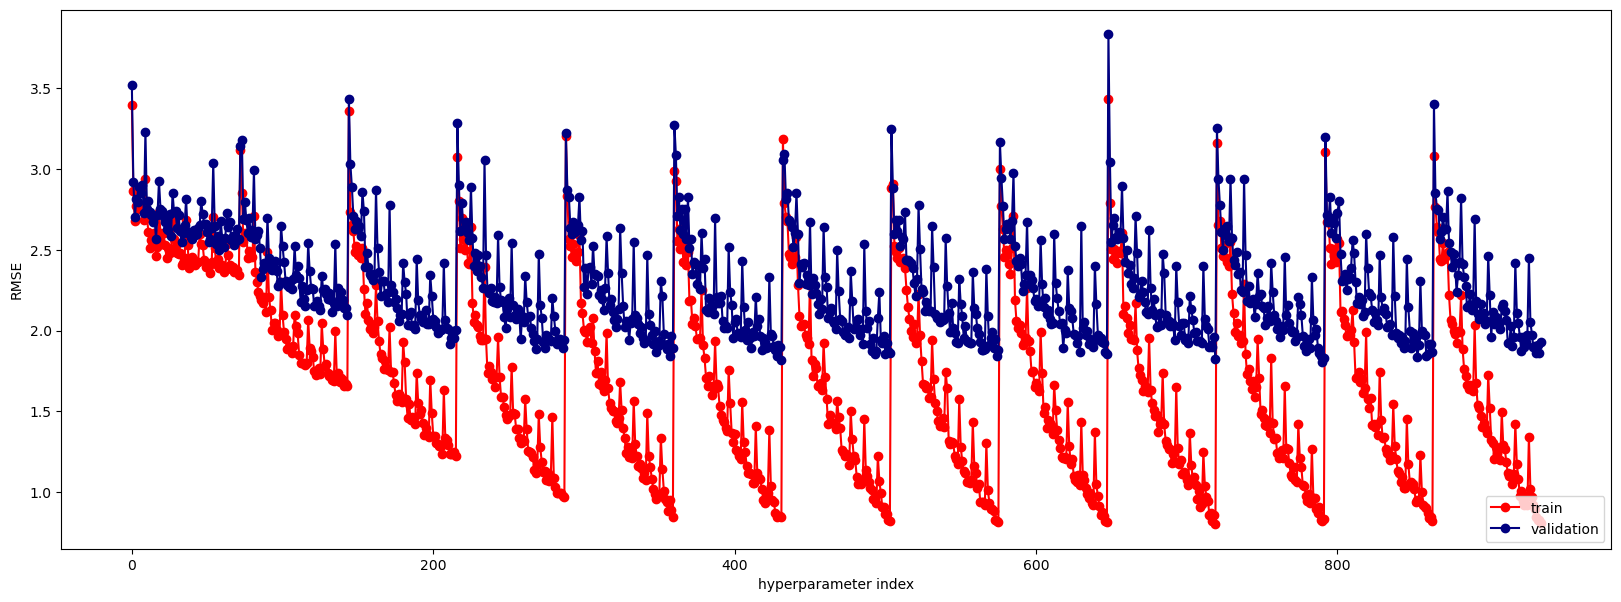

In [128]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(train_rmse, 'o-', label='train', color='red')
ax.plot(val_rmse, 'o-', label='validation', color='navy')
ax.set_xlabel('hyperparameter index')
ax.set_ylabel('RMSE')
ax.legend(loc="lower right")
fig.show()

In [196]:
best_params = param_comb[np.argmin(val_rmse)]
best_params

{'n_estimators': 3, 'max_samples': 200, 'max_depth': 5}

In [197]:
best_clf_forest = CustomRandomForest(**best_params)
best_clf_forest.fit(Xtrain, ytrain)

In [267]:
def evaluate(clf, X, y_true, title: str):
    ypred = clf.predict(X)
    rmse = metrics.mean_squared_error(y_true=y_true, y_pred=ypred, squared=False)
    mae = metrics.mean_absolute_error(y_true=y_true, y_pred=ypred)

    fig, ax = plt.subplots()

    ax.scatter(y_true, ypred)
    ax.set_xlabel("Prediction (Y_hat)")
    ax.set_ylabel("Label (Y)")
    ax.set_title(f"{title}\nRMSE = {rmse:.2f}\nMAE = {mae:.2f}")

    fig.show()

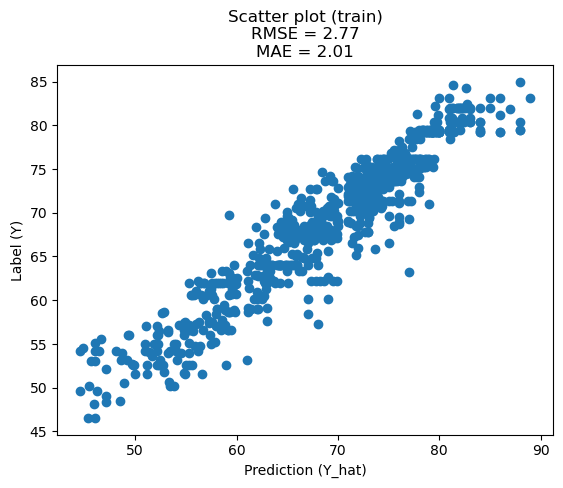

In [199]:
evaluate(best_clf_forest, Xtrain, ytrain, title="Random Forest (train)")

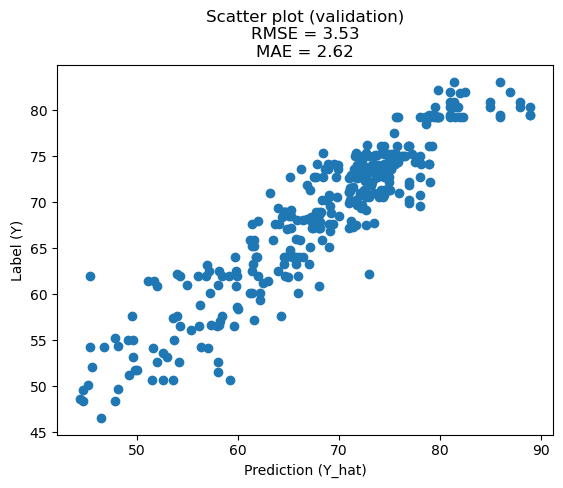

In [200]:
evaluate(best_clf_forest, Xval, yval, data_type="Random Forest (validation)")

Vidime, ze validacni RMSE a MAE jsou o neco vetsi nez trenovaci.

# 3. Hrebenova Regrese

### Vhodnost Daneho Modelu
***

Dany model pro takova data neni az tak vhodny jako nahodny les, protoze mame dost mnoho chybejicich hodnost. To je samo o sobe velky problem. Nemuzeme nahradit to nejakou hodnotou -1, protoze to bude vychylovat celou nadrovinu nekam jinam (velky bias), pro nova data muze to mit velmi spatny vliv.

Dalsi slabost techto dat je pomerne hodne odlehlych hodnot a pomerne silnych. To taky muze vytvaret dost neprijemny bias a vychylovat nasi nadrovinu.

Nastesti dat mame dost, i kdyz se zbavime datovych bodu s outliery a s chybejicimi hodnotami. Pro hrebenovou nebo linearni regresi toto by nemelo mit velky vliv, chceme spise kvalitnejsi data, tj navzajem linearni nezavisle a nekolinearni, velke jejich uz neni tak podstatne. Kazdopadne hrebenova regrese dokaze za cenu nejakeho vetsiho biasu se vyporadat s kolinearitou a linearni zavislosti priznaku (zatim my vubec jeste neanalyzovali jestli mame priznaky kolinearni nebo linearne zavisle)

### Priprava a Rozdeleni Dat
***

Vyhodime data s chybejicimi hodnotami, ale zatim nechame odlehle hodnoty. Pokud bude cas vyhodime i odlehle hodnoty a podivame se jak se nam zlepsi metriky.

In [353]:
df_ridge = df_preprocessed.copy(deep=True)
df_ridge.dropna(inplace=True)
df_ridge.isna().any()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
BMI                                False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
HIV/AIDS                           False
GDP                                False
Population                         False
thinness  1-19 years               False
thinness 5-9 years                 False
Income composition of resources    False
Schooling                          False
dtype: bool

In [354]:
print(f"Pocet datovych bodu pred vyhozenim chybejicih hodnot: \t{len(df_preprocessed)}")
print(f"Pocet datovych bodu po vyhozenim chybejicih hodnot: \t{len(df_ridge)}")
print(f"Pocet datovych bodu prave vyhozenych: \t{len(df_preprocessed) -len(df_ridge)}")

Pocet datovych bodu pred vyhozenim chybejicih hodnot: 	2718
Pocet datovych bodu po vyhozenim chybejicih hodnot: 	1529
Pocet datovych bodu prave vyhozenych: 	1189


1189 datovych bodu - nazdar

Dataset mame pripraveny pro hrebenovou regresi, rozdelime si ted data.

In [355]:
# 60% trenovaci, 40% zbytek
Xtrain, Xrest, ytrain, yrest = train_test_split(
    df_ridge.drop(columns=["Life expectancy"]),
    df_ridge["Life expectancy"],
    test_size=0.4,
)

# 0.4*0.6 = 0.24 -> 24% validacni, 0.4*0.4 = 0.16 -> 16% testovaci
Xtest, Xval, ytest, yval = train_test_split(Xrest, yrest, test_size=0.6)

### Trenovani a Evaluace - Bez Normalizace
***

Zatim zkusime hrebenovou regresi bez normalizace. Jediny hyperparametr ktery budeme optimalizovat je penalizacni clen $\lambda$, ktery vsak v kodu nazveme alpha.

Plati, ze cim vetsi je lambda, tim vetsi je bias, tj. nase nadrovina je vic vychylenejsi od reality, a zaroven tim je mensi variance - rozptyl. $\lambda$ nam umoznuje vice penalizovat bud ctverce, anebo regularizacni clen.

K rozsahu hyperparametru $\lambda$ jeste pridame na zacatek 0, abychom videli i vysledek s porovnanim s obycejnou linearni regresi

In [271]:
alphas = np.array([0, *np.linspace(1, 500, 100)])
alphas[:5]

array([ 0.     ,  1.     ,  6.0404 , 11.08081, 16.12121])

In [272]:
warnings.filterwarnings("ignore")

train_rmse = []
val_rmse = []
for alpha in alphas:
    clf_ridge = Ridge(alpha=alpha)
    clf_ridge.fit(Xtrain, ytrain)
    ytrain_pred = clf_ridge.predict(Xtrain)
    yval_pred = clf_ridge.predict(Xval)
    train_rmse.append(metrics.mean_squared_error(ytrain, ytrain_pred, squared=False))
    val_rmse.append(metrics.mean_squared_error(yval, yval_pred, squared=False))
    
warnings.filterwarnings("always")

Pokud spustime, uvidime ze dostavame hodne chyb pro nejake hodnoty $\lambda$. Proto mame nastavene na zacatku aby to ignorovalo warningy. Vypiseme sem co to pise:

> LinAlgWarning: Ill-conditioned matrix (rcond=1.06625e-16): result may not be accurate.

To pro nas znamena, ze nas dataset ma nejake problemy. Zkusime se podivat jestli priznaky jsou linearne nezavisle

In [273]:
X = Xtrain.values
X[0] # prvni radek matice je prvni radek dataframu

array([   122.     ,   2011.     ,      1.     ,    121.     ,
            1.     ,      6.9    ,    119.21243,     87.     ,
            4.     ,     54.9    ,      1.     ,     91.     ,
            7.5    ,     87.     ,      0.1    ,    927.72317,
       377782.     ,      2.     ,      1.9    ,      0.758  ,
           12.9    ])

In [274]:
matrix_rank =  np.linalg.matrix_rank(X)

In [275]:
matrix_rank == len(Xtrain.columns)

True

Sloupce jsou linearne nezavisle, protoze hodnost matice je 21 a je stejna jako pocet priznaku (vektoru). Takze nejspise problem lezi nekde v tom, ze nemame provedenou normalizaci nebo mame nekde silnou kolinearitu. Kazdopadne pokracujeme dal a podivame se na vysledky.

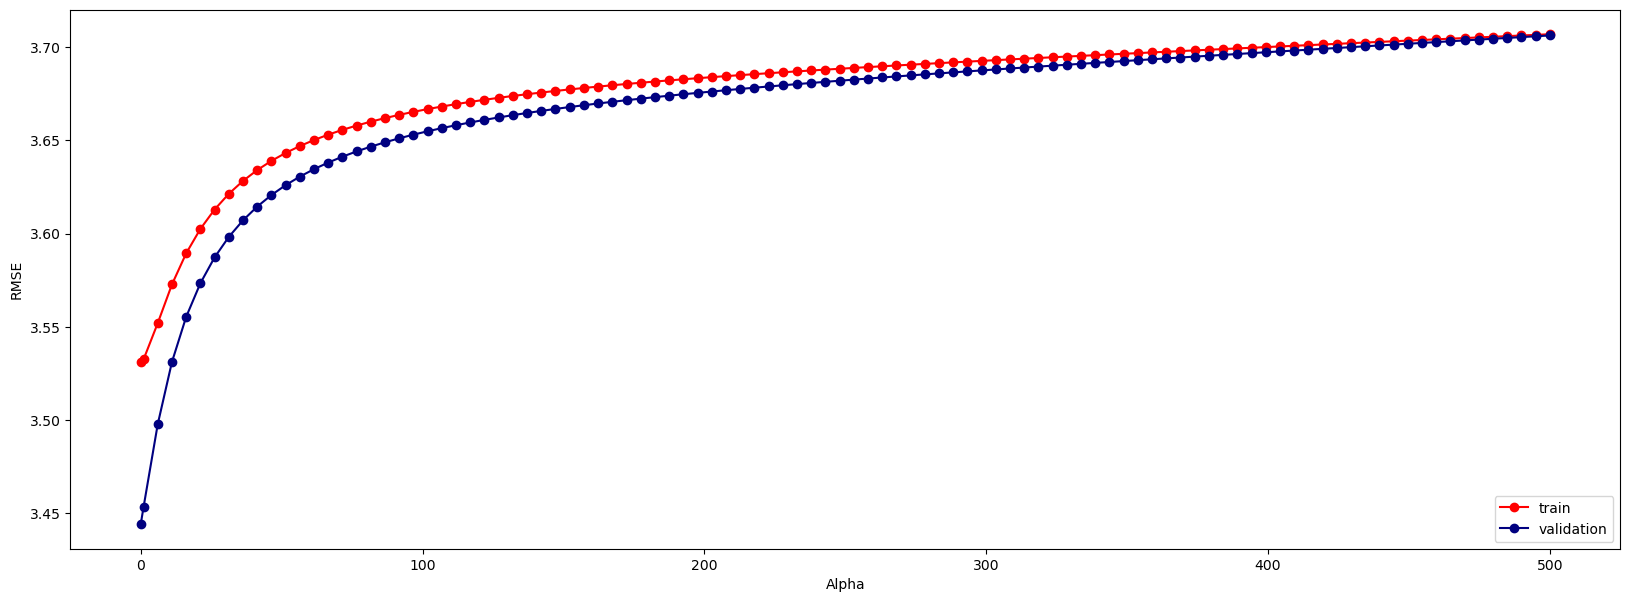

In [277]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(alphas, train_rmse, 'o-', label='train', color='red')
ax.plot(alphas, val_rmse, 'o-', label='validation', color='navy')
ax.set_xlabel('Alpha')
ax.set_ylabel('RMSE')
ax.legend(loc="lower right")
fig.show()

Vidime, ze vyhrava obycejna linearni regrese. A to je protoze nemame normalizovana data a penalizacni clen penalizuje "nespravedlive" vuci vsem priznakum. Penalizace musi byt stejna jak pri priznaky s velkymi hodnotami tak i pro priznaki s malymi hodnotami. Proto pozdeji znormalizujeme data a uvidime vysledek.

In [280]:
best_alpha = alphas[np.argmin(val_rmse)]
best_alpha

0.0

In [281]:
best_clf_ridge = Ridge(alpha=best_alpha)
best_clf_ridge.fit(Xtrain, ytrain)

/home/bardanik-rem/mambaforge/envs/ml1/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.15555e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.0)

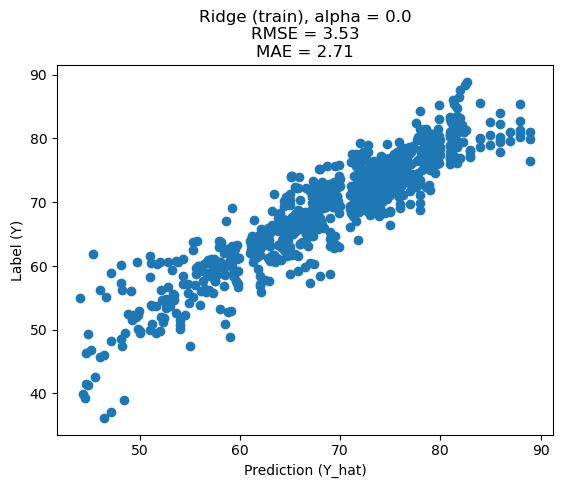

In [282]:
evaluate(best_clf_ridge, Xtrain, ytrain, title=f"Ridge (train), alpha = {best_alpha}")

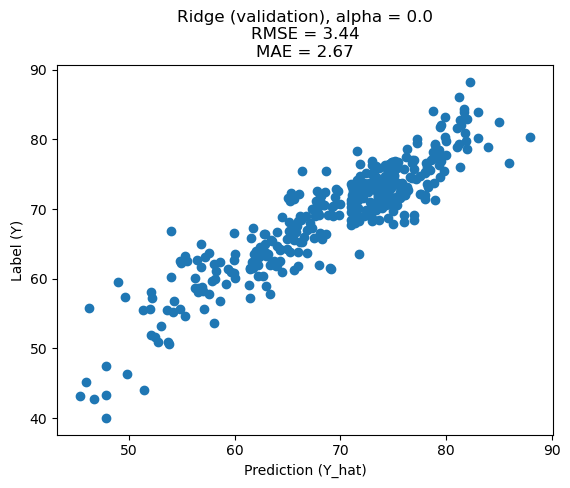

In [283]:
evaluate(best_clf_ridge, Xval, yval, title=f"Ridge (validation), alpha = {best_alpha}")

### Trenovani a Evaluace - MinMax Normalizace
***

Normalizace nam dost muze pomoct pri hrebenove regrese, protoze umoznuje penalizovat vahy spravedlive vuci priznakum, protoze vsechny priznaky budou mit skalu...

MinMax normalizace jako i Standardizace je pouza linarni transformace (posun a naskalovani), rozdil je, ze MinMax naskaluje na interval od 0 do 1, ale Standardizace ztransformuje na standardni nomralni rozdeleni (viz standardization.ipynb uplne dole, kde jsem zkusil oba zpusoby na nahodnych datech s ruznymi variance a mediany)

Tak pojdme aplikovat MinMax normalizaci:

In [284]:
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xval_scaled = scaler.transform(Xval)

In [285]:
Xtrain_scaled[0]

array([0.67033, 0.73333, 1.     , 0.1662 , 0.00067, 0.38578, 0.007  ,
       0.87629, 0.00003, 0.70777, 0.0005 , 0.91667, 0.49524, 0.87629,
       0.     , 0.00771, 0.00029, 0.07011, 0.06429, 0.80983, 0.52147])

In [286]:

train_rmse = []
val_rmse = []
for alpha in alphas:
    clf_ridge = Ridge(alpha=alpha)
    clf_ridge.fit(Xtrain_scaled, ytrain)
    ytrain_pred = clf_ridge.predict(Xtrain_scaled)
    yval_pred = clf_ridge.predict(Xval_scaled)
    train_rmse.append(metrics.mean_squared_error(ytrain, ytrain_pred, squared=False))
    val_rmse.append(metrics.mean_squared_error(yval, yval_pred, squared=False))
    

A vidime ze uz nemame zadne warningy! To znamena ze problem orpavdu byl v tom, ze data nebyla normalizovana!

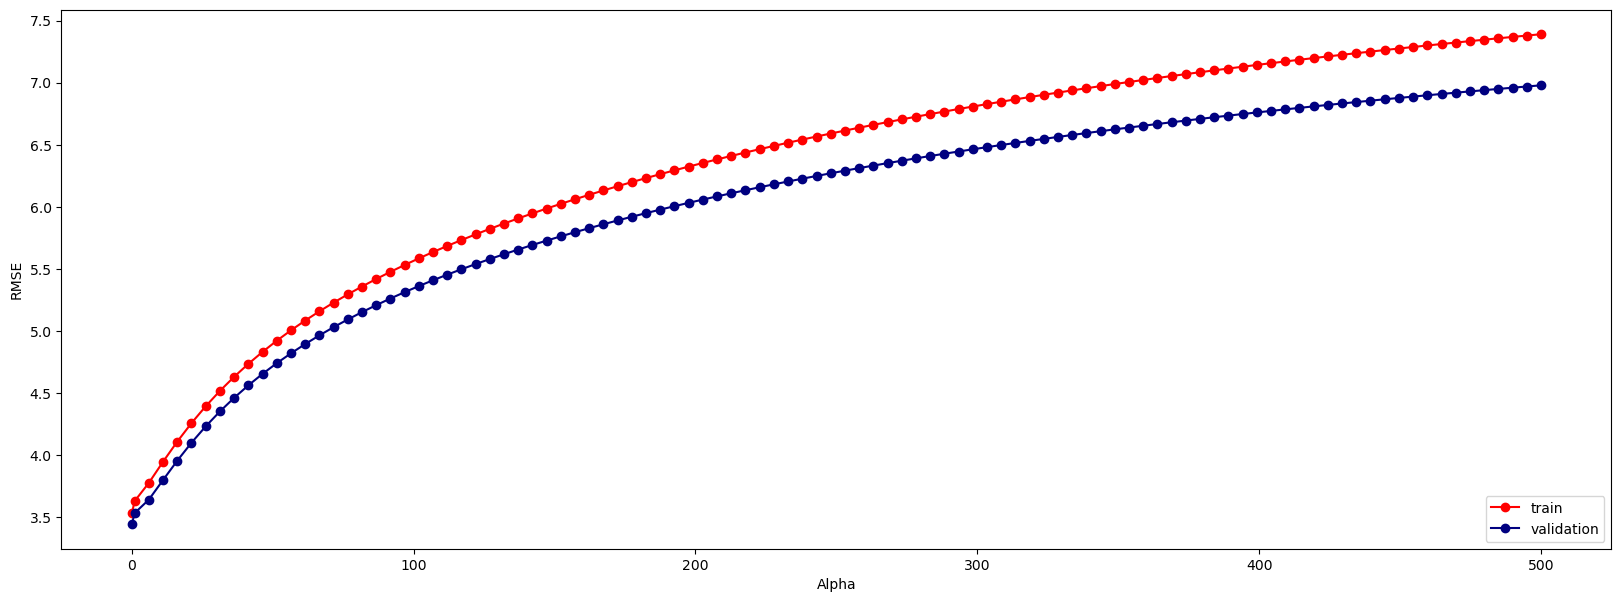

In [287]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(alphas, train_rmse, 'o-', label='train', color='red')
ax.plot(alphas, val_rmse, 'o-', label='validation', color='navy')
ax.set_xlabel('Alpha')
ax.set_ylabel('RMSE')
ax.legend(loc="lower right")
fig.show()

In [288]:
best_alpha = alphas[np.argmin(val_rmse)]
best_alpha

0.0

In [289]:
best_clf_ridge = Ridge(alpha=best_alpha)
best_clf_ridge.fit(Xtrain_scaled, ytrain)

Ridge(alpha=0.0)

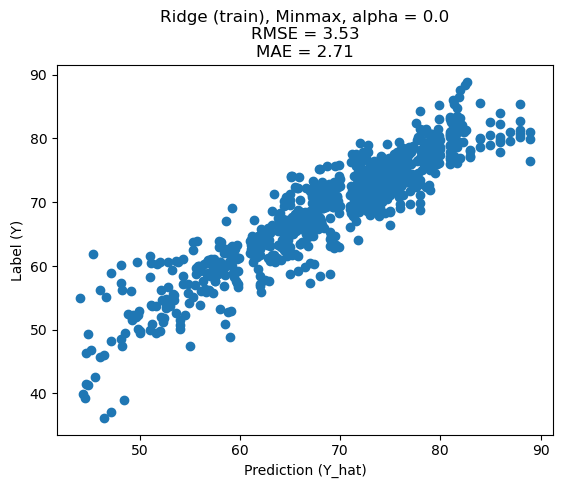

In [290]:
evaluate(best_clf_ridge, Xtrain_scaled, ytrain, title=f"Ridge (train), Minmax, alpha = {best_alpha}")

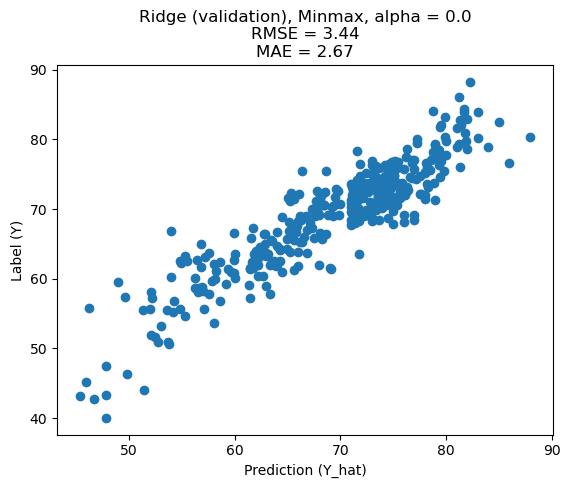

In [292]:
evaluate(best_clf_ridge, Xval_scaled, yval, title=f"Ridge (validation), Minmax, alpha = {best_alpha}")

Vidime, ze zase vyhrala linearni regrese.. Hrebenova regrese nejak moc nam nepomohla zatim. Ale klidne se muze stat, ze mame proste velmi sikovne rozdelena data. Proto mozna by byl dobry napad zkusit cross validaci s ridge.

Mimochodem tady lze pozorvoat jak linearni regrese je nezavisla na linearni transformaci. Pouzili jsme minmax a aplikovali linearni regresi, a mame uplne totozny vysledek.

### Trenovani a Evaluace - Standardizace
***

In [293]:
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xval_scaled = scaler.transform(Xval)

In [294]:
Xtrain_scaled[0]

array([ 0.65347,  0.87738,  0.43339, -0.35894, -0.26515,  0.52971,
       -0.34743,  0.33872, -0.22882,  0.82321, -0.2687 ,  0.34318,
        0.66769,  0.1566 , -0.31475, -0.41392, -0.19954, -0.61314,
       -0.64422,  0.6579 ,  0.23759])

In [295]:
train_rmse = []
val_rmse = []
for alpha in alphas:
    clf_ridge = Ridge(alpha=alpha)
    clf_ridge.fit(Xtrain_scaled, ytrain)
    ytrain_pred = clf_ridge.predict(Xtrain_scaled)
    yval_pred = clf_ridge.predict(Xval_scaled)
    train_rmse.append(metrics.mean_squared_error(ytrain, ytrain_pred, squared=False))
    val_rmse.append(metrics.mean_squared_error(yval, yval_pred, squared=False))

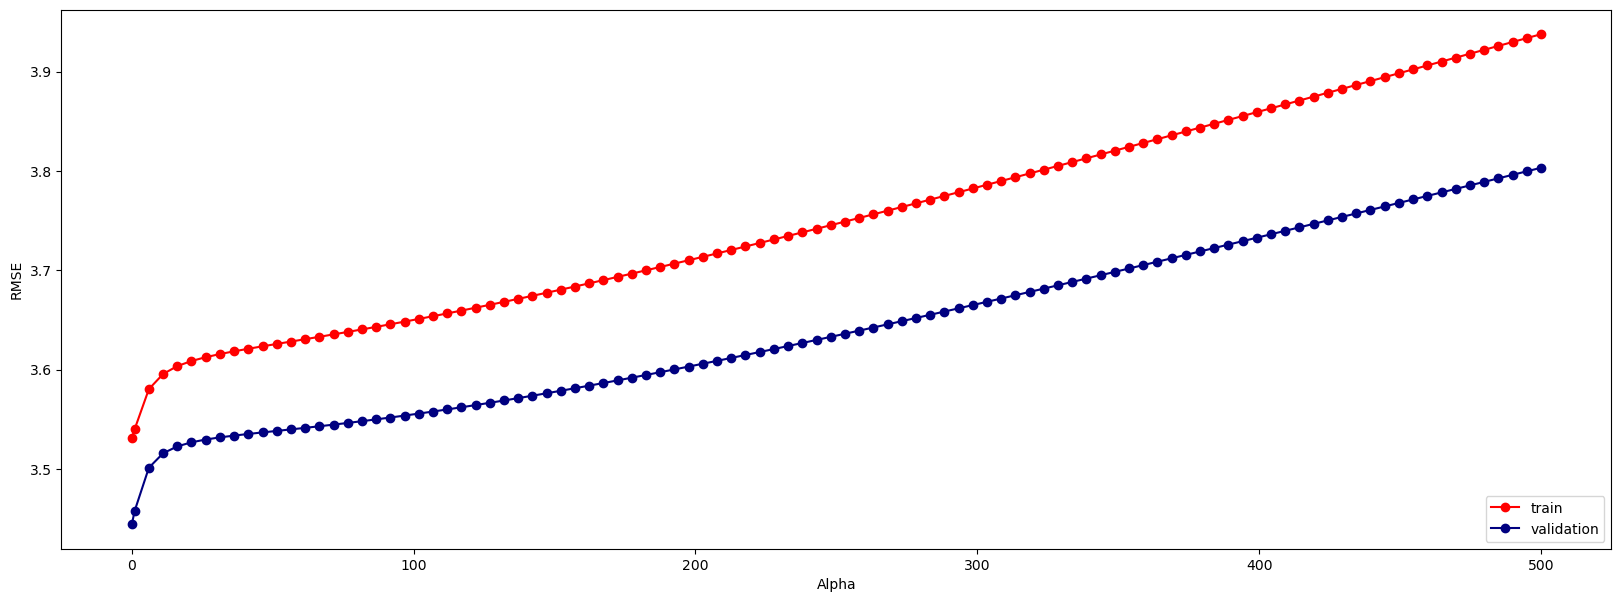

In [296]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(alphas, train_rmse, 'o-', label='train', color='red')
ax.plot(alphas, val_rmse, 'o-', label='validation', color='navy')
ax.set_xlabel('Alpha')
ax.set_ylabel('RMSE')
ax.legend(loc="lower right")
fig.show()

Vidime, ze Standardizace dopadla o trochu lepe, ale zase vyhrava linearni regrese.

In [297]:
best_alpha = alphas[np.argmin(val_rmse)]
best_alpha

0.0

In [298]:
best_clf_ridge = Ridge(alpha=best_alpha)
best_clf_ridge.fit(Xtrain_scaled, ytrain)

Ridge(alpha=0.0)

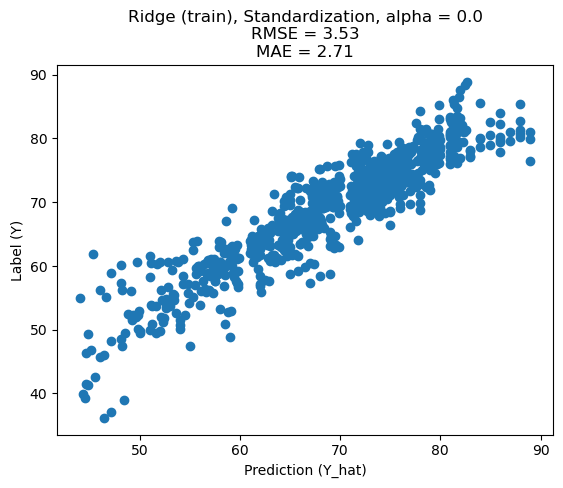

In [299]:
evaluate(best_clf_ridge, Xtrain_scaled, ytrain, title=f"Ridge (train), Standardization, alpha = {best_alpha}")

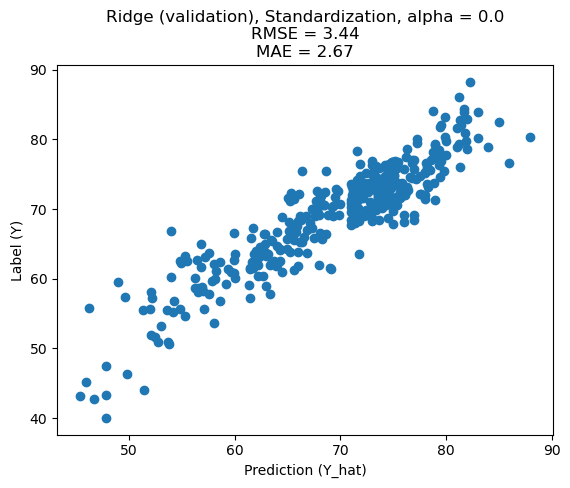

In [300]:
evaluate(best_clf_ridge, Xval_scaled, yval, title=f"Ridge (validation), Standardization, alpha = {best_alpha}")

Takze obycejna linearni regrese zatime zvlada nejlepe tuto ulohu.
Samozrejme muze hodne zalezet na tom, jak jsme rozdelil data pro trenovaci mnozinu. Pokud zbyde cas, zkusime cross validaci pro hrebenovou regresi.

### Trenovani a Evaluace - Standardizace a Cross Validace
***

In [356]:
scaler = StandardScaler()
Xcross_scaled = scaler.fit_transform(pd.concat([Xtrain, Xval]))
ycross = pd.concat([ytrain, yval])

In [359]:
alphas = np.array([0, *np.linspace(0.0001, 1, 50), *np.linspace(1, 500, 100)])

In [365]:
k_folds = 5
cross_rmse = []
cross_mae = []
for alpha in alphas:
    clf_ridge_cross = Ridge(alpha=alpha)
    rmse_scores = cross_val_score(
        estimator=clf_ridge_cross, X=Xcross_scaled, y=ycross, cv=k_folds, scoring="neg_root_mean_squared_error"
    )
    mae_scores = cross_val_score(
        estimator=clf_ridge_cross, X=Xcross_scaled, y=ycross, cv=k_folds, scoring="neg_mean_absolute_error"
    )
    cross_rmse.append(-np.mean(rmse_scores))
    cross_mae.append(-np.mean(mae_scores))

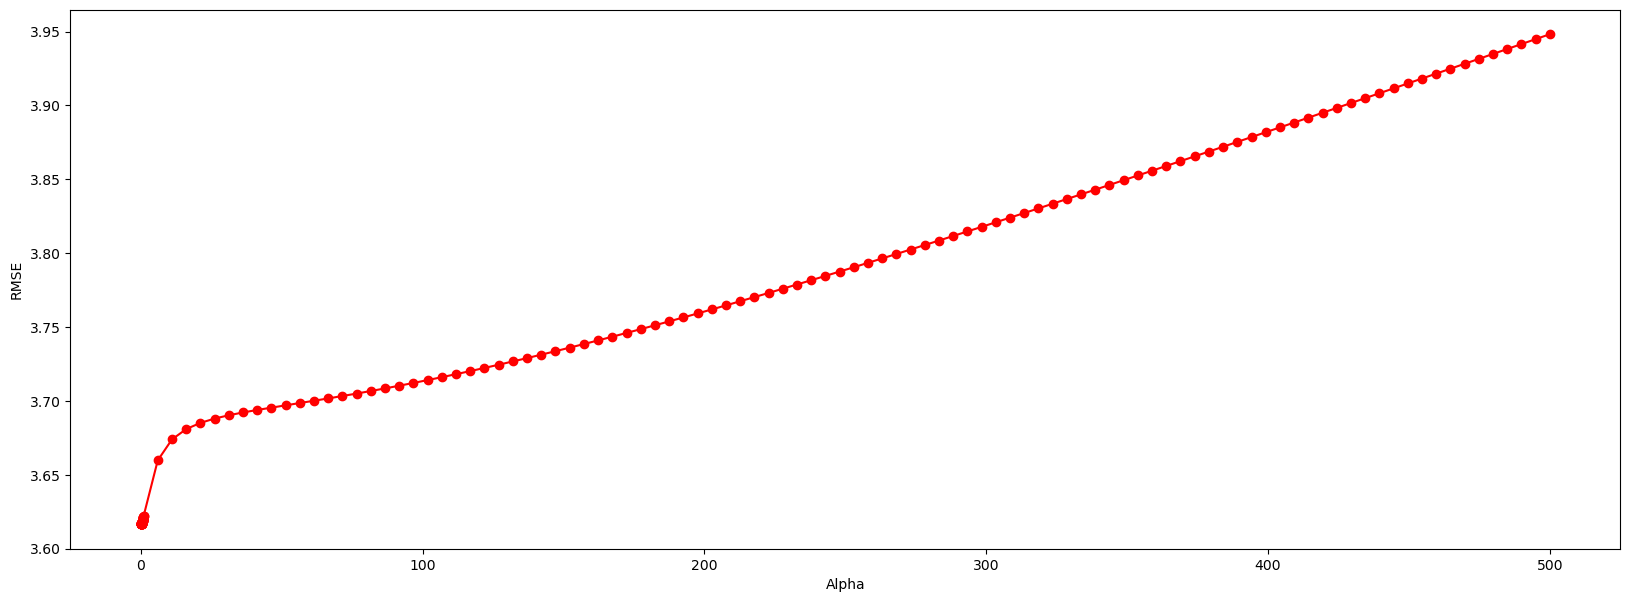

In [366]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(alphas, cross_rmse, 'o-', color='red')
ax.set_xlabel('Alpha')
ax.set_ylabel('RMSE')
fig.show()

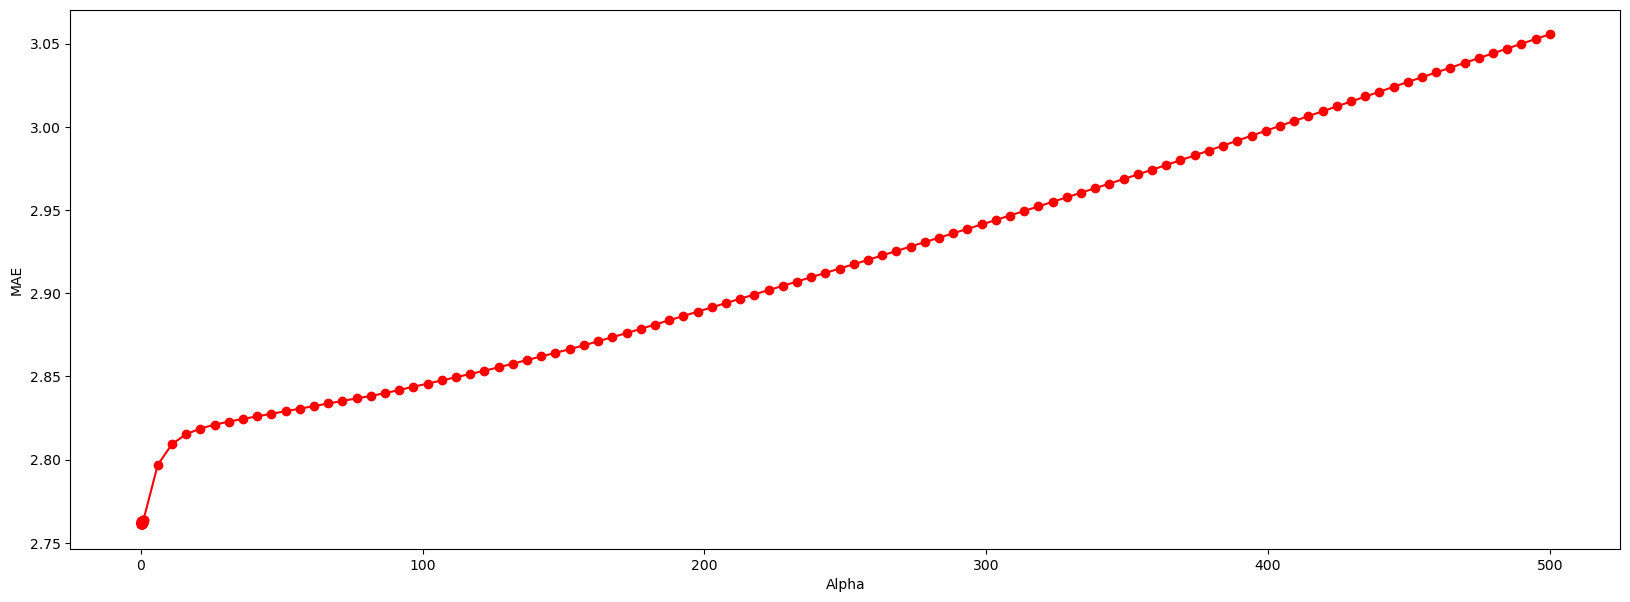

In [367]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(alphas, cross_mae, 'o-', color='red')
ax.set_xlabel('Alpha')
ax.set_ylabel('MAE')
fig.show()

In [373]:
best_cross_rmse = np.min(cross_rmse)
best_cross_mae = np.min(cross_mae)
best_alpha = alphas[np.argmin(cross_rmse)]
print(f"Best alpha (RMSE): \t{best_alpha}")
print(f"Best RMSE with cross validation: \t{cross_rmse[np.argmin(cross_rmse)]}")
print(f"Best MAE with cross validation: \t{cross_mae[np.argmin(cross_rmse)]}")

Best alpha (RMSE): 	0.2245673469387755
Best RMSE with cross validation: 	3.616567229188875
Best MAE with cross validation: 	2.7614628421465026


A uz vidime, ze konecne vyhrala hrebenova regrese - stacilo vzit dost male alpha. Navic pro tuto hodnotu mame RMSE a MAE spocitane pomoci cross validace - muzeme vice spolehnout na to, ze vliv nahodnosti rozdeleni dat neni tak silny a muzeme tomuto vysledku vice verit.

Jeste je potreba rict, ze u jinych modelu jsme nezkouseli hodnoty alpha mezi 0 a 1 - jenom tady jsme to pridali. Meli bychom se vratit z vyzkouset u vsech modelu i male hodnoty alpha. Ale jelikoz zbyva pouhych 40 minut do druheho deadlinu, tak to uz delat nebudeme.

# 4. Lasso a Linearni Regrese

### Vhodnost Daneho Modelu
***

Pro lasso plati vicemene to same jako pro hrebenovou regresi. Ale mame tady dost priznaku, proto lasso nam muze pomoct vyhodit priznaky, ktere nejsou dulezite, a tim nam vylepsit linearni regresi

Navic u lasso nemuzeme najit explicitni reseni kvuli absolutnim hodnotam v regularizacnim clenu - budeme muset pouzit iterativni pristup pro nalezeni optimalnich hodnot vah, tj. mame dalsi hyperparametr - max_iter

### Priprava a Rozdeleni Dat
***

Stejna operace jako s hrebenovou regresi

In [315]:
df_lasso = df_preprocessed.copy(deep=True)
df_lasso.dropna(inplace=True)
df_lasso.isna().any()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
BMI                                False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
HIV/AIDS                           False
GDP                                False
Population                         False
thinness  1-19 years               False
thinness 5-9 years                 False
Income composition of resources    False
Schooling                          False
dtype: bool

In [316]:
# 60% trenovaci, 40% zbytek
Xtrain, Xrest, ytrain, yrest = train_test_split(
    df_lasso.drop(columns=["Life expectancy"]),
    df_lasso["Life expectancy"],
    test_size=0.4,
)

# 0.4*0.6 = 0.24 -> 24% validacni, 0.4*0.4 = 0.16 -> 16% testovaci
Xtest, Xval, ytest, yval = train_test_split(Xrest, yrest, test_size=0.6)

### Lasso - Standardizace
***

In [325]:
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xval_scaled = scaler.transform(Xval)

In [326]:
alphas = np.linspace(1, 500, 100)

In [327]:
train_rmse = []
val_rmse = []
for alpha in alphas:
    clf_lasso = Lasso(alpha=alpha, max_iter=10000)
    clf_lasso.fit(Xtrain_scaled, ytrain)
    ytrain_pred = clf_lasso.predict(Xtrain_scaled)
    yval_pred = clf_lasso.predict(Xval_scaled)
    train_rmse.append(metrics.mean_squared_error(ytrain, ytrain_pred, squared=False))
    val_rmse.append(metrics.mean_squared_error(yval, yval_pred, squared=False))

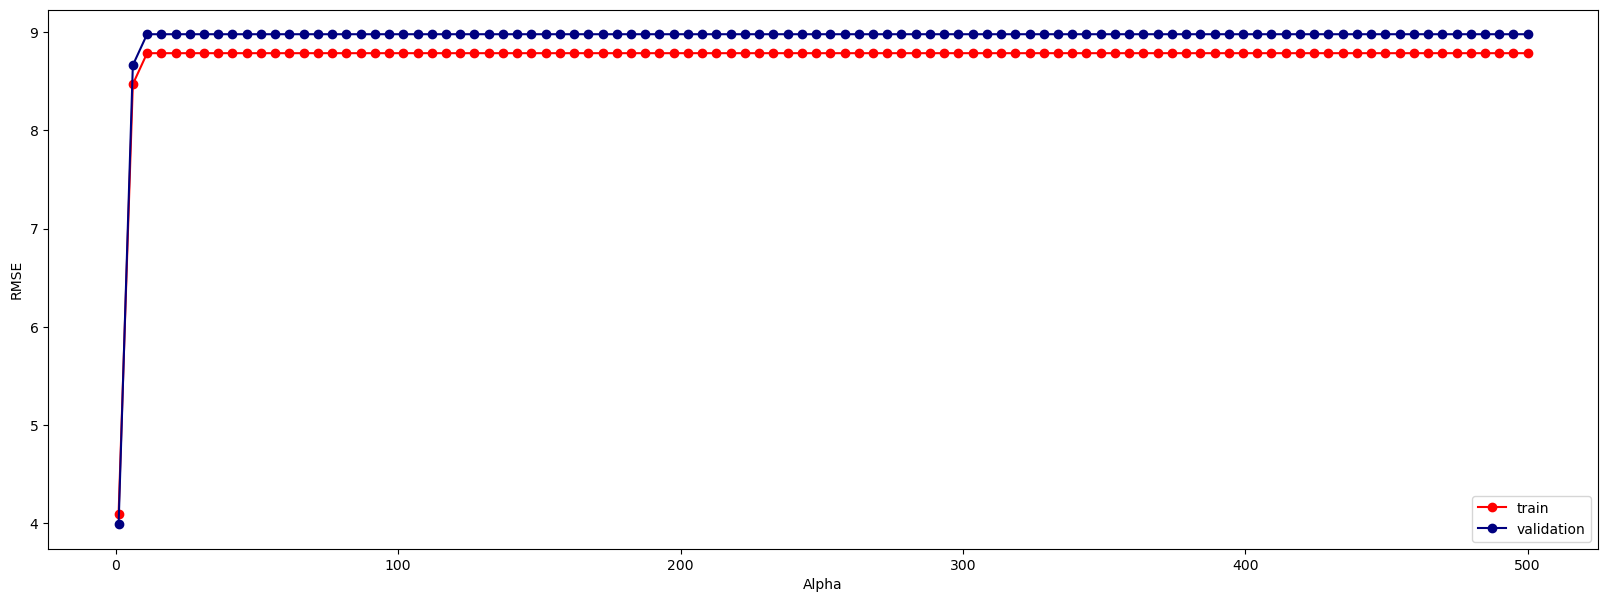

In [328]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(alphas, train_rmse, 'o-', label='train', color='red')
ax.plot(alphas, val_rmse, 'o-', label='validation', color='navy')
ax.set_xlabel('Alpha')
ax.set_ylabel('RMSE')
ax.legend(loc="lower right")
fig.show()

In [329]:
best_alpha_lasso = alphas[np.argmin(val_rmse)]
best_alpha_lasso

1.0

In [330]:
best_clf_lasso = Lasso(alpha=best_alpha_lasso)
best_clf_lasso.fit(Xtrain_scaled, ytrain)

Lasso()

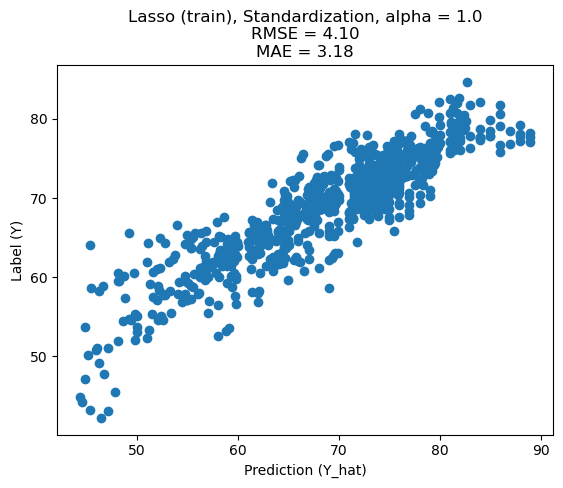

In [331]:
evaluate(best_clf_lasso, Xtrain_scaled, ytrain, title=f"Lasso (train), Standardization, alpha = {best_alpha_lasso}")

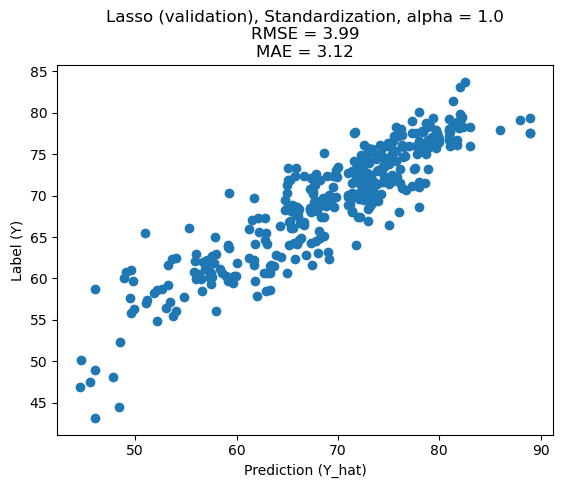

In [332]:
evaluate(best_clf_lasso, Xval_scaled, yval, title=f"Lasso (validation), Standardization, alpha = {best_alpha_lasso}")

Vidime, ze samotne lasso taky vicemene dobre zvlada tuto ulohu. Ale zase - zatim vysledky vypadaji dost nestabilni. Chtela by se cross validace pro duslednou kontrolu.

My ale chceme pouzit lasso hlavne k tomu, abychom odstranili priznaky, ktere nehraji dulezitou roli (maji nulovou vahu)

Počet nenulových koeficientů: 6


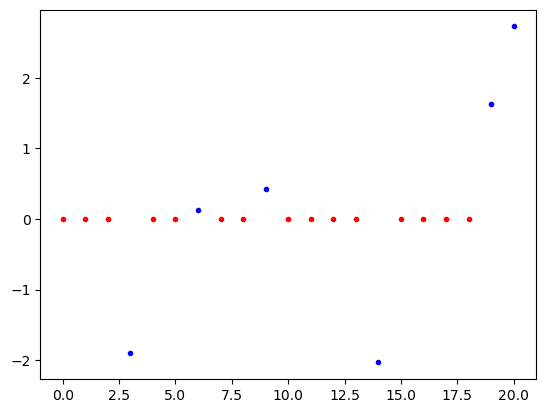

In [337]:
print(f"Počet nenulových koeficientů: {np.sum(np.abs(best_clf_lasso.coef_) > 0)}")

fig, ax = plt.subplots()
ii = np.array(range(len(best_clf_lasso.coef_)), dtype=int)
ax.plot(
    ii[np.abs(best_clf_lasso.coef_) == 0],
    best_clf_lasso.coef_[np.abs(best_clf_lasso.coef_) == 0],
    "r.",
)
ax.plot(
    ii[np.abs(best_clf_lasso.coef_) > 0],
    best_clf_lasso.coef_[np.abs(best_clf_lasso.coef_) > 0],
    "b.",
)


fig.show()

Cervene jsou nulove koeficienty. Zkusime ted odstranit priznaky s temito koeficienty a pouzijeme klasickou linearni regresi.

### Linearni Regrese s Lasso
***

In [346]:
selector = SelectFromModel(estimator=best_clf_lasso)
Xtrain_sel = Xtrain.loc[:,selector.get_support()]
Xval_sel = Xval.loc[:, selector.get_support()]

In [347]:
Xtrain_sel.head()

,Adult Mortality,percentage expenditure,BMI,HIV/AIDS,Income composition of resources,Schooling
762,29.0,400.134297,47.8,0.3,0.628,12.0
582,96.0,24.887204,54.4,0.1,0.747,13.1
20,88.0,437.062100,55.1,0.1,0.738,13.3
1102,19.0,5.381783,19.0,0.1,0.629,11.1
1043,161.0,192.929783,43.5,0.8,0.583,10.8


In [348]:
Xval_sel.head()

,Adult Mortality,percentage expenditure,BMI,HIV/AIDS,Income composition of resources,Schooling
1267,27.0,18.216614,75.2,0.1,0.584,11.9
1826,295.0,85.717538,42.7,1.4,0.461,8.6
1344,97.0,14.556105,64.9,0.1,0.766,13.3
2353,162.0,7.829009,39.9,0.2,0.622,11.3
257,251.0,9.804075,24.1,1.3,0.458,10.0


Je videt ze to opravdu odstranilo patricne priznaky. Zkusime ted linearni regresi

In [349]:
clf_linreg = LinearRegression()
clf_linreg.fit(Xtrain_sel, ytrain)

LinearRegression()

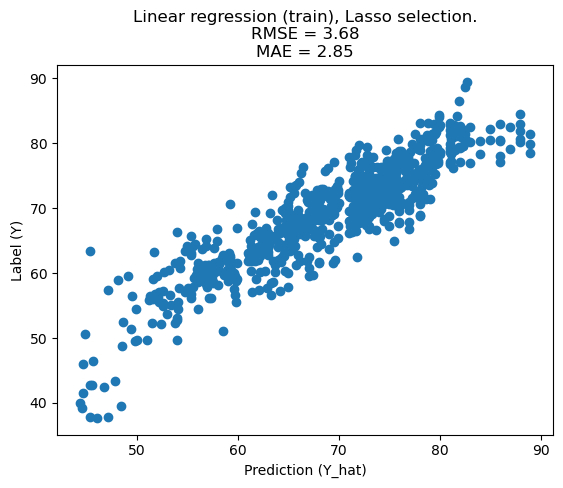

In [351]:
evaluate(clf_linreg, Xtrain_sel, ytrain, title="Linear regression (train), Lasso selection.")

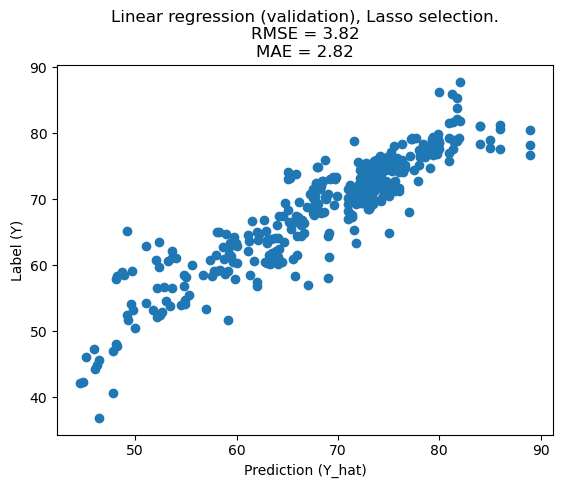

In [352]:
evaluate(clf_linreg, Xval_sel, yval, title="Linear regression (validation), Lasso selection.")

Vidime, ze vysledky nejsou az tak pekne, jak by se dalo ocekavat.

# 5. Finalni Evaluace

### Vyber Finalniho Modelu a jeho Evaluace
***

Podle vseho jako nejlepsi model vybereme nahodny les. Hlavni duvody jsou takove, ze to ma dost slusne vysledky, zaroven rozhodovaci stromy jsou stabilnejsi a robustnejsi na rozdil od ostatnich modelu, proto budeme spise verit nahodnemu lesu

U nahodneho lesu jak nejlepsi hyperparametry mame:

{'n_estimators': 3, 'max_samples': 200, 'max_depth': 5}

In [386]:
# 60% trenovaci, 40% zbytek
Xtrain, Xrest, ytrain, yrest = train_test_split(
    df_random_forest.drop(columns=["Life expectancy"]),
    df_random_forest["Life expectancy"],
    test_size=0.4,
)

# 0.4*0.6 = 0.24 -> 24% validacni, 0.4*0.4 = 0.16 -> 16% testovaci
Xtest, Xval, ytest, yval = train_test_split(Xrest, yrest, test_size=0.6)

In [387]:
best_clf = CustomRandomForest(n_estimators=3, max_samples=200, max_depth=5)
best_clf.fit(Xtrain, ytrain)

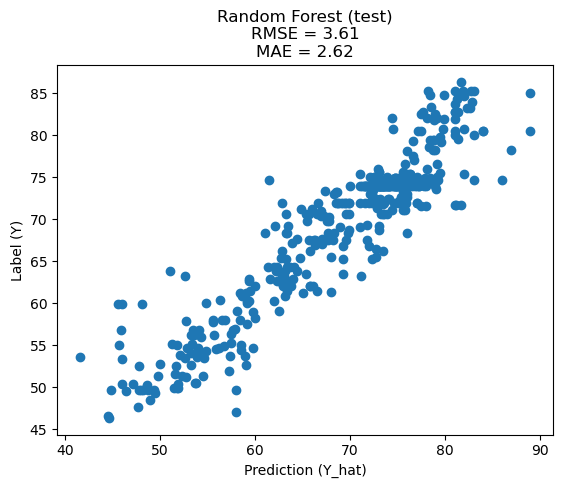

In [388]:
evaluate(best_clf, Xtest, ytest, title="Random Forest (test)")

Muzeme tedy ocekavat na jinych datech RMSE $\approx$ 3.61 a MAE $\approx$ 2.62

### Evaluation.csv
***

In [390]:
df_eval = pd.read_csv('evaluation.csv')

In [391]:
df_eval['Country'] = country_label_encoder.transform(df_eval['Country'])
df_eval['Status'] = status_label_encoder.transform(df_eval['Status'])

In [392]:
df_eval.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,9,2015,1,118.0,5,NaN,0.000000,96.0,0,52.5,...,98.0,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7
1,9,2014,1,119.0,5,0.01,306.182431,94.0,0,51.5,...,97.0,6.40,94.0,0.1,7891.299776,953579.0,2.8,2.9,0.752,12.2
2,9,2013,1,121.0,5,2.14,275.651493,93.0,164,5.6,...,96.0,5.54,93.0,0.1,7875.756953,941681.0,2.8,2.8,0.745,11.9
3,9,2012,1,123.0,5,0.01,285.610391,88.0,0,49.7,...,92.0,5.37,89.0,0.1,7496.335728,9295784.0,2.8,2.8,0.742,11.8
4,9,2011,1,125.0,5,1.98,263.142699,84.0,0,48.8,...,91.0,5.10,87.0,0.1,7189.691229,917382.0,2.8,2.9,0.741,11.7


In [393]:
df_eval.fillna(value=-1, inplace=True)

In [401]:
y_pred = best_clf.predict(df_eval)

In [408]:
df_to_export = df_eval[['Country', 'Year']].copy(deep=True)
df_to_export['Life expectancy'] = y_pred
df_to_export.head()
df_to_export.to_csv("result.csv")

### Country v datasetu Evaluation
***

Zajima nas jestli evaluation ma nejake staty navic nez data.csv, nebo naopak.

In [23]:
df_eval = pd.read_csv("evaluation.csv")

In [24]:
eval_countries = set(df_eval['Country'].unique())
data_countries = set(df_data['Country'].unique())


In [25]:
len(data_countries)

183

In [26]:
len(eval_countries)

35

In [27]:
diff = eval_countries - data_countries
len(diff)

0

Vidime, ze odectenim od mnoziny statu z evaluation.csv mnoziny statu z data.csv, dostavame prazdnou mnozinu - tj. eval countries zrejme obsahuje nic navic a zrejme data_countries obsahuje mnohem vic statu.

Tato informace se muze hodit pro analyzu jak pouzit one-hot encoding pro priznak Country (bylo popsano pri analyze sloupce Country vyse)